In [1]:
import sklearn.linear_model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
trains = pd.read_csv('data/sydtrains.csv', thousands=',', index_col='STATION')
trains.head()

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Central,CBD,2014,6/05/2014,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101
Town Hall,CBD,2014,7/05/2014,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103
Parramatta,Western,2014,19/11/2014,Yes,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960,4,905
North Sydney,North Shore,2014,19/08/2014,Yes,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610,5,1402


In [7]:
trains2014 = trains[trains.YEAR == 2014]

In [26]:
scatter_data_in = trains2014.loc[ : , ['IN_1500_1830', 'OUT_1830_0200' , 'OUT_0600_0930']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D37EF98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C555518>]], dtype=object)

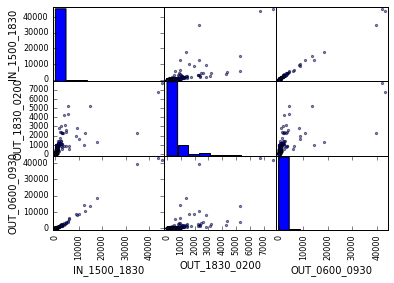

In [27]:
pd.scatter_matrix(scatter_data_in)

In [28]:
getoff_am = trains2014.loc[ : , ['OUT_0600_0930']]
getin_pm = trains2014.IN_1500_1830

In [29]:
regressor = sklearn.linear_model.RANSACRegressor()

In [30]:
regressor.fit(getoff_am, getin_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [32]:
predictions_for_pm= regressor.predict(getoff_am)

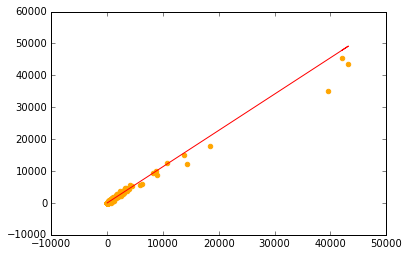

In [44]:
plt.scatter(trains2014.OUT_0600_0930, trains2014.IN_1500_1830, color = 'orange')
plt.plot(trains2014.OUT_0600_0930, predictions_for_pm, color = 'red')

In [45]:
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
regressor.estimator_.coef_

array([ 1.13791223])

In [49]:
regressor.estimator_.intercept_

10.813713966149862